In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [3]:
img = np.load('./NORMALIZED-RP-STACK.npy')

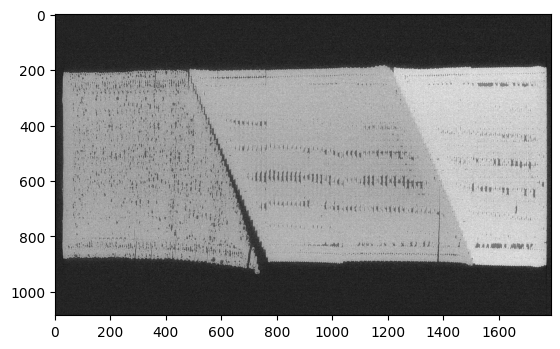

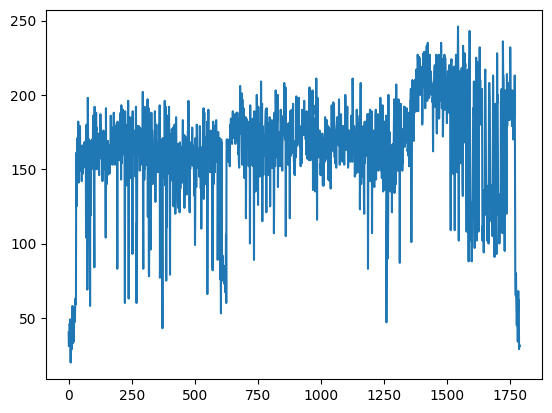

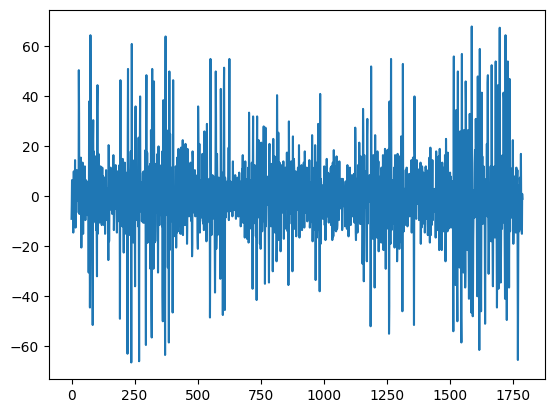

In [4]:
layer = 900
mat = img[543,layer,:]
diffmat = np.gradient(mat)

plt.imshow(img[:,layer,:], cmap='gray')
plt.show()
plt.plot(mat)
plt.show()

plt.plot(diffmat)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


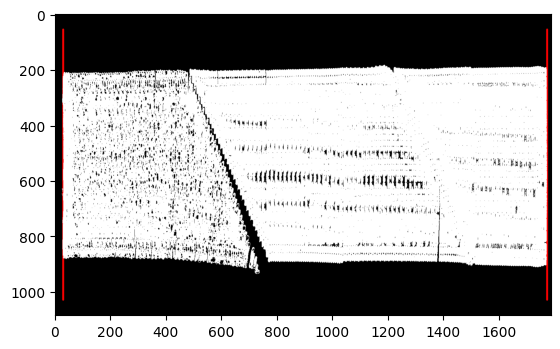

In [5]:
for left in range(1789):
    if diffmat[left] > 30:
        break

lines = np.zeros((1085, 1789, 3), dtype=np.uint8)
lines = cv.line(lines, (left, 55), (left, 1030), (255,0,0), 5)

for right in reversed(range(1789)):
    if diffmat[right] < -30:
        break

lines = cv.line(lines, (right, 55), (right, 1030), (255,0,0), 5)

plc = np.zeros([1085, 1789, 3])
plc[:,:,0] = img[:,layer,:]
plc[:,:,1] = img[:,layer,:]
plc[:,:,2] = img[:,layer,:]

ret, plc = cv.threshold(plc, 120, 255, cv.THRESH_BINARY)

plt.imshow(plc+lines)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\TJ\AppData\Local\Temp\ipykernel_27044\292892966.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


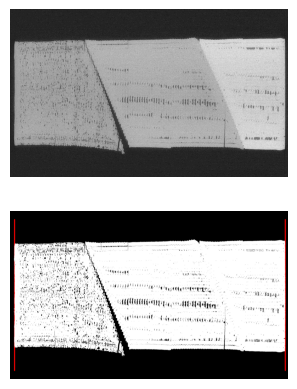

In [7]:
fig, axs = plt.subplots(2,1)
axs[0].imshow(img[:,layer,:], cmap='gray')
axs[0].axis('off')

axs[1].imshow(plc+lines)
axs[1].axis('off')

fig.tight_layout
fig.show()

In [5]:
lengths = []

for i in range(1085):
    mat = img[543,i,:]
    diffmat = np.gradient(mat)
    for left in range(1789):
        if diffmat[left] > 30:
            break
    for right in reversed(range(1789)):
        if diffmat[right] < -30:
            break
    lengths.append(right-left)

In [12]:
def reject_outliers(data, m = 3.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else np.zeros(len(d))
    return data[s<m]

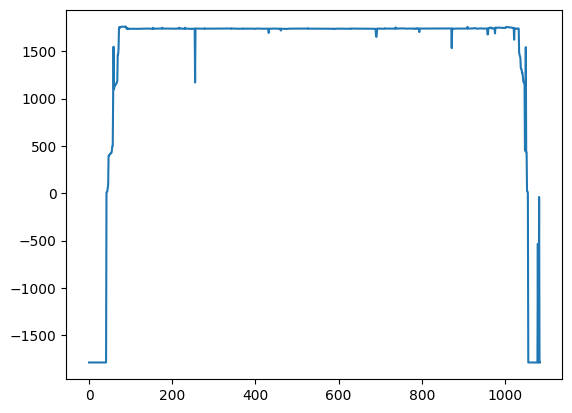

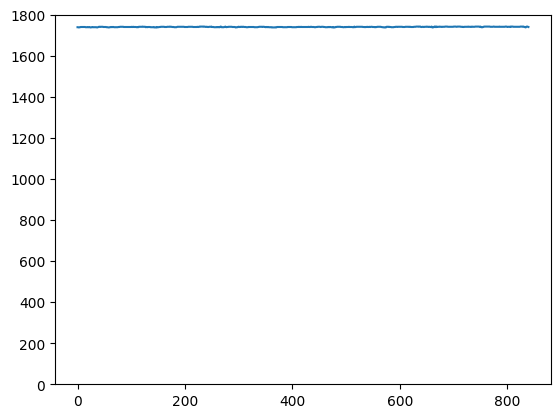

1740.2785714285715


In [13]:
plt.plot(lengths)
plt.show()

filtered = reject_outliers(np.asarray(lengths))

plt.plot(filtered)
plt.ylim([0, 1800])
plt.show()

print(np.mean(filtered))